In [41]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [2]:
import numpy as np

In [9]:
# set configurations for number of samples
sample_size = 100
nr_sample = 20
num_steps = 10
x_b = np.linspace(0,1,num_steps)

n_folds = 5

### Bounded distributions

In [12]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [13]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.19,0.30,0.41,0.48,0.57,0.66,0.74,0.82,1.0,arcsine
1,0.0,0.28,0.34,0.41,0.49,0.55,0.70,0.74,0.86,1.0,arcsine
2,0.0,0.20,0.31,0.40,0.49,0.51,0.59,0.65,0.69,1.0,arcsine


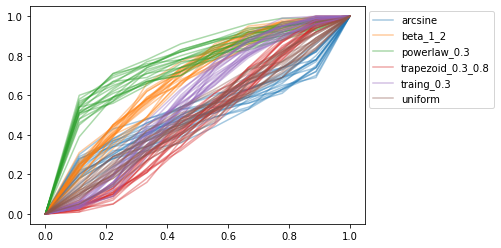

In [14]:
dem.get_edf_plot(edf_df, x_b)

### SVM

In [15]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,21))

In [16]:
res_svm = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'edf', 1)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
res_svm.to_csv('results/edf/res_svm_bounded.csv')

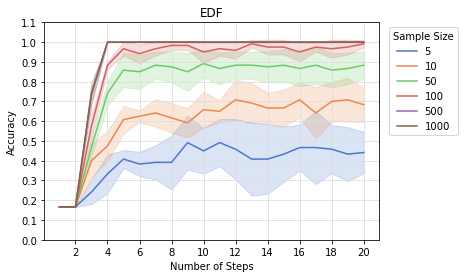

In [42]:
cm.plot_cv_numsteps_samplesize(res_svm, 'EDF')

### Logistic Regression

In [36]:
res_lr = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'edf', 2)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

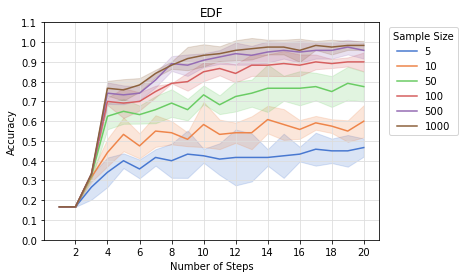

In [43]:
cm.plot_cv_numsteps_samplesize(res_lr,'EDF')

### Heavytail distributions

In [44]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [45]:
perc_95 = np.percentile(heavytail_samples.iloc[:,:-1],95)
x_h = np.linspace(0,perc_95,num_steps)
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.60,0.77,0.87,0.89,0.92,0.94,0.95,0.95,0.95,cauchy
1,0.0,0.57,0.81,0.90,0.95,0.97,0.97,0.98,0.99,0.99,cauchy
2,0.0,0.54,0.68,0.78,0.85,0.88,0.91,0.92,0.93,0.95,cauchy


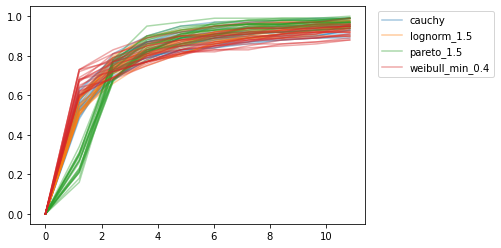

In [46]:
dem.get_edf_plot(edf_df, x_h)

### SVM

In [47]:
res_svm_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'edf', 1, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

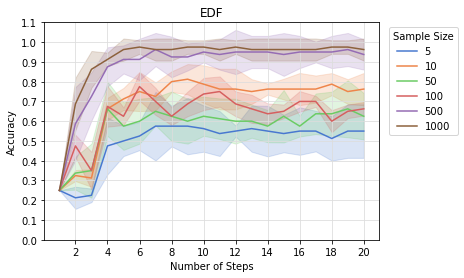

In [48]:
cm.plot_cv_numsteps_samplesize(res_svm_ht,'EDF')

### Logistic Regression

In [49]:
res_lr_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'edf', 2, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

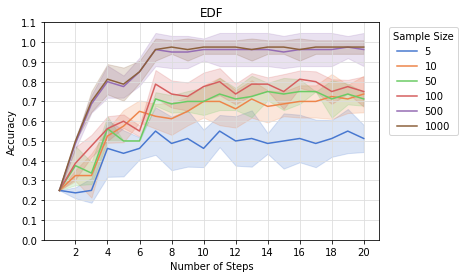

In [50]:
cm.plot_cv_numsteps_samplesize(res_lr_ht,'EDF')